## **Pregunta 4**

Trabaje con la base de datos `data.csv`

• ¿Cuál es el ingreso promedio de los clientes con formación universitaria? ¿Qué porcentaje de missings tiene la variable exp_sf?  ¿Qué porcentaje de clientes tiene formación universitaria?  ¿Cuál es el promedio de la variable edad? ¿Qué porcentaje de clientes de Lima presentan missings en la variable exp_sf? 

• ¿Cuál es la probabilidad de no tener atraso si tu edad es menor a 35 años? ¿Cuál es la probabilidad de no tener días de atraso e ingresos menores a 5000? ¿Cuál es el nivel de ahorro promedio de los clientes con educación técnica y vivienda propia? ¿Cuál es el promedio de la variable ingreso? ¿Cuál es la probabilidad de no tener atraso si tu edad es mayor a 45 años? 


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv")
data

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.00,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.00,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.00,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.00,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.00,2000.00,11010.65,189,Lima,0,TECNICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,0,PROPIA,43,7917,106.0,12,13660.00,121543.40,8338.46,224,Lima,1,UNIVERSITARIA
8395,1,0,FAMILIAR,29,3352,25.0,0,813.00,2200.00,0.00,197,Lima,1,UNIVERSITARIA
8396,0,0,FAMILIAR,32,6821,19.0,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA
8397,1,0,PROPIA,38,3882,7.0,12,3069.23,23994.00,13954.65,221,Lambayeque,1,UNIVERSITARIA


1. **¿Cuál es el ingreso promedio de los clientes con formación universitaria?**

In [7]:
question_one = data[data["nivel_educ"] == "UNIVERSITARIA"]['ingreso'].mean()
print(f"El ingreso promedio de los estudiantes con formación universitaria es de {question_one:.2f}.")

El ingreso promedio de los estudiantes con formación universitaria es de 5710.40.


2. **¿Qué porcentaje de missings tiene la variable exp_sf?**

In [11]:
question_two = data["exp_sf"].isna().sum()/len(data) * 100
print(f"Porcentaje de observaciones nulas: {question_two:.2f}%")

Porcentaje de observaciones nulas: 21.79%


**3. ¿Qué porcentaje de clientes tiene formación universitaria?**

El porcentaje de clientes que tiene formación universitaria es de 57.17%


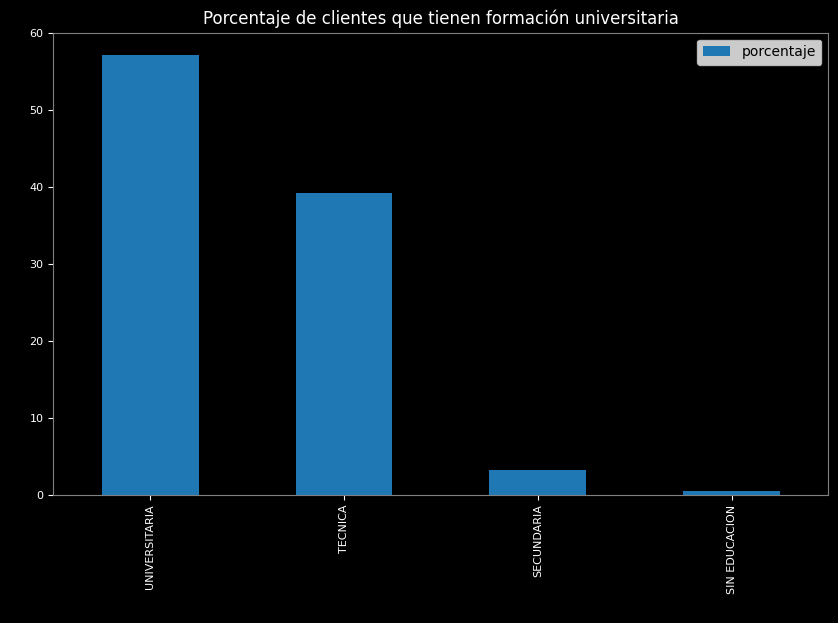

In [28]:
question_three = pd.DataFrame(data.groupby("nivel_educ")["nivel_educ"].count()).rename(columns={"nivel_educ": "cantidad"}).reset_index()
question_three["porcentaje"] = question_three["cantidad"] / question_three["cantidad"].sum() * 100
question_three = question_three.sort_values(by="porcentaje", ascending=False)
print(f"El porcentaje de clientes que tiene formación universitaria es de {question_three['porcentaje'].iloc[0]:.2f}%")
fig, ax = plt.subplots(figsize=(10, 6), facecolor="black")
question_three.plot(x="nivel_educ", y="porcentaje", kind="bar", ax=ax)
ax.set_xlabel("Nivel educativo")
ax.set_ylabel("Porcentaje de clientes")
ax.set_title("Porcentaje de clientes que tienen formación universitaria")
ax.set_facecolor("black")
ax.tick_params(color="white")
ax.tick_params(axis="x", labelcolor="white", labelsize=8)
ax.tick_params(axis="y", labelcolor="white", labelsize=8)
ax.title.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
plt.show()

**4. ¿Cuál es el promedio de la variable edad?**

In [31]:
# La variable 'edad' tiene valores faltantes
data["edad"].isnull().sum() # No tiene valores faltantes
print(f"El promedio de edad es {data['edad'].mean():.2f} años.")

El promedio de edad es 36.40 años.


**5. ¿Qué porcentaje de clientes de Lima presentan missings en la variable exp_sf?**

In [36]:
# La variable 'zona' y 'exp_sf' tienen valores faltantes
data["zona"].isnull().sum() # No tiene valores faltantes
data["exp_sf"].isnull().sum() # Tiene valores faltantes

total_lima = len(data[data["zona"] == "Lima"])
total_lima_missing = len(data[data["zona"] == "Lima"].isnull().sum())
print(f"Número total de clientes que presentan missing en la variables 'exp_sf' es : {(total_lima_missing/total_lima)*100:.2f}%")

Número total de clientes que presentan missing en la variables 'exp_sf' es : 0.28%


**6. ¿Cuál es la probabilidad de no tener atraso si tu edad es menor a 35 años?**

Debemos calcular una probabilidad condicional.

$$
P(\text{atraso} = 0 | \text{edad} < 35)
$$

In [39]:
first_condition = data[data["edad"] < 35]
second_condition = first_condition[first_condition["atraso"] == 0]
probability = len(second_condition) / len(data) * 100
print(f"La probabilidad que un cliente de no tener atraso si su edad es menor a 35 años es de {probability:.2f}%.")

La probabilidad que un cliente de no tener atraso si su edad es menor a 35 años es de 30.22%.


**7. ¿Cuál es la probabilidad de no tener días de atraso e ingresos menores a 5000?**

Esto es una probabilidad conjunta.

$$
P(\text{atraso} = 0 \text{y} \text{ingresos} < 5000)
$$

In [40]:
total = len(data)
condition = data[(data["atraso"] == 0) & (data["ingreso"] < 5000)]
probability = len(condition) / total * 100
print(f"Probabilidad de que el ingreso sea menor a 5000 y el atraso sea 0: {probability:.2f}%.")

Probabilidad de que el ingreso sea menor a 5000 y el atraso sea 0: 44.62%.


**8. ¿Cuál es el nivel de ahorro promedio de los clientes con educación técnica y vivienda propia?**

In [45]:
question_eight = data[(data["nivel_educ"] == "TECNICA") & (data["vivienda"] == "PROPIA")]["nivel_ahorro"].mean()
print(f"El nivel de ahorro promedio de los clientes con educación técnica y vivienda propia es de {question_eight:.2f}.")

El nivel de ahorro promedio de los clientes con educación técnica y vivienda propia es de 11.47.


**9. ¿Cuál es el promedio de la variable ingreso?**

In [42]:
# La variable 'ingreso' tiene valores faltantes
data["ingreso"].isnull().sum() # No tiene valores faltantes
print(f"El ingreso promedio de los clientes es {data['ingreso'].mean():.2f}")

El ingreso promedio de los clientes es 4350.41


**10. ¿Cuál es la probabilidad de no tener atraso si tu edad es mayor a 45 años?**

Esto es una probabilidad condicional.

$$
P(\text{atraso} = 0 | \text{edad} > 45)
$$

In [43]:
first_condition = data[data["edad"] > 45]
second_condition = first_condition[first_condition["atraso"] == 0]
probability = len(second_condition) / len(data) * 100
print(f"La probabilidad que un cliente de no tener atraso si su edad es mayor a 45 años es de {probability:.2f}%.")

La probabilidad que un cliente de no tener atraso si su edad es mayor a 45 años es de 12.51%.
